In [32]:
from lib.modules.strategy import StrategyBase
from lib.model import Ohlcv
from typing import List
from datetime import datetime
from lib.utils.time import dt_to_ts, ts_to_dt
from lib.utils.indicators import bollinger_bands_indicator

In [36]:
# 超过布林带上轨就卖出一半仓位，跌破布林带下轨就花一半本金买入
class BollStrategy(StrategyBase):
    # 计算布林带一次只最少需要过去20个交易日的K线图柱子
    _data_fetch_amount = 20

    def _addtional_state_parameters(self):
        return {
            'position': 0 # 设置一个额外状态记录当前的仓位
        }
    
    def _core(self, ohlcv: List[Ohlcv]) -> List[Ohlcv]:
        """
        Bollinger Bands strategy implementation.
        """
        # Calculate Bollinger Bands
        result = bollinger_bands_indicator(ohlcv, timeperiod = self._data_fetch_amount)
        if self.current_price > result.upperband[-1]:
            # 超过布林带上轨
            if self.hold_amount > 0:
                if self.state.get('position') == 1: # 当前是满仓状态
                    self.sell(self.hold_amount / 2) # 卖出一半仓位
                    self.state.set('position', 0.5) 
                elif self.state.get('position') == 0.5: # 当前是半仓状态
                    self.sell(self.hold_amount)
                    self.state.set('position', 0) 
        if self.current_price < result.lowerband[-1]:
            # 跌破布林带下轨
            if self.state.get('position') == 0:
                # 当前是空仓状态，花一半钱买入
                self.buy(self.free_money / 2)
                self.state.set('position', 0.5) 
            elif self.state.get('position') == 0.5:
                # 当前是半仓状态，花剩下钱买入
                self.buy(self.free_money)
                self.state.set('position', 1) 

In [37]:
strategy = BollStrategy()

Progress:   0%|                                                                                                    | 0/365 [00:00<?, ?it/s]2025-04-30 17:32:31,674 - INFO - Attempting to buy: spent=50000.0, amount=None.
2025-04-30 17:32:31,679 - INFO - Attempting to buy: spent=50000.0, amount=None.
2025-04-30 17:32:31,731 - INFO - Attempting to sell: amount=0.7852837135527665.
2025-04-30 17:32:31,737 - INFO - Attempting to sell: amount=0.7852837135527665.
Progress:  15%|█████████████                                                                             | 53/365 [00:00<00:00, 529.89it/s]2025-04-30 17:32:31,781 - INFO - Attempting to buy: spent=52311.87482566449, amount=None.
2025-04-30 17:32:31,801 - INFO - Attempting to buy: spent=52311.87482566449, amount=None.
2025-04-30 17:32:31,836 - INFO - Attempting to sell: amount=0.8298497907540635.
Progress:  31%|███████████████████████████▎                                                             | 112/365 [00:00<00:00, 561.56it/s]202

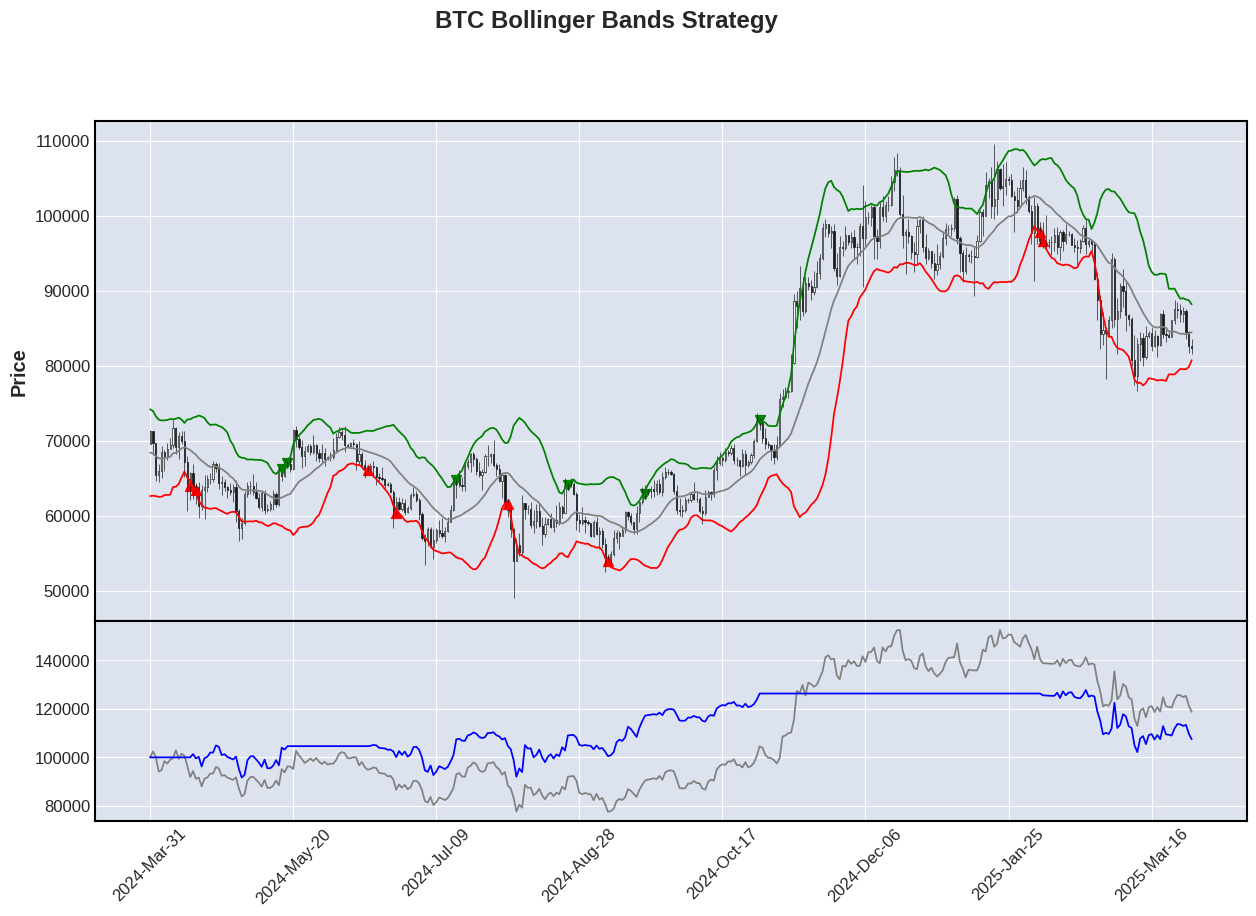

In [44]:
strategy.back_test(
    start_time=datetime(2024, 4, 1),
    end_time=datetime(2025, 4, 1),
    symbol='BTC/USDT',
    frame='1d',
    name='BTC Bollinger Bands Strategy',
    investment=100000,
    show_indicators=['boll']
)

2025-04-30 17:35:46,365 - INFO - Range cache MISS or PARTIAL HIT or read failure: frame="1d"||symbol="600588". Acquiring lock for potential fetch.
2025-04-30 17:35:46,538 - INFO - Acquired lock id 173a1f7b-a151-46dc-af32-63f22e099247
2025-04-30 17:35:46,543 - INFO - Range cache MISS or PARTIAL HIT *inside lock*: frame="1d"||symbol="600588". Proceeding with fetch.
2025-04-30 17:35:46,543 - INFO - Fetching data before cache: [2024-03-04 08:00:00, 2024-12-26 08:00:00)
2025-04-30 17:35:48,174 - INFO - Updating metadata for key frame="1d"||symbol="600588"::ashare_ohlcv_cache::metadata to {'query_range': [1709510400000, 1745884800000]} (inside lock)
Progress:   0%|                                                                                                    | 0/240 [00:00<?, ?it/s]2025-04-30 17:35:48,457 - INFO - Attempting to buy: spent=50000.0, amount=None.
2025-04-30 17:35:48,518 - INFO - Attempting to buy: spent=50000.0, amount=None.
Progress:  47%|██████████████████████████████████

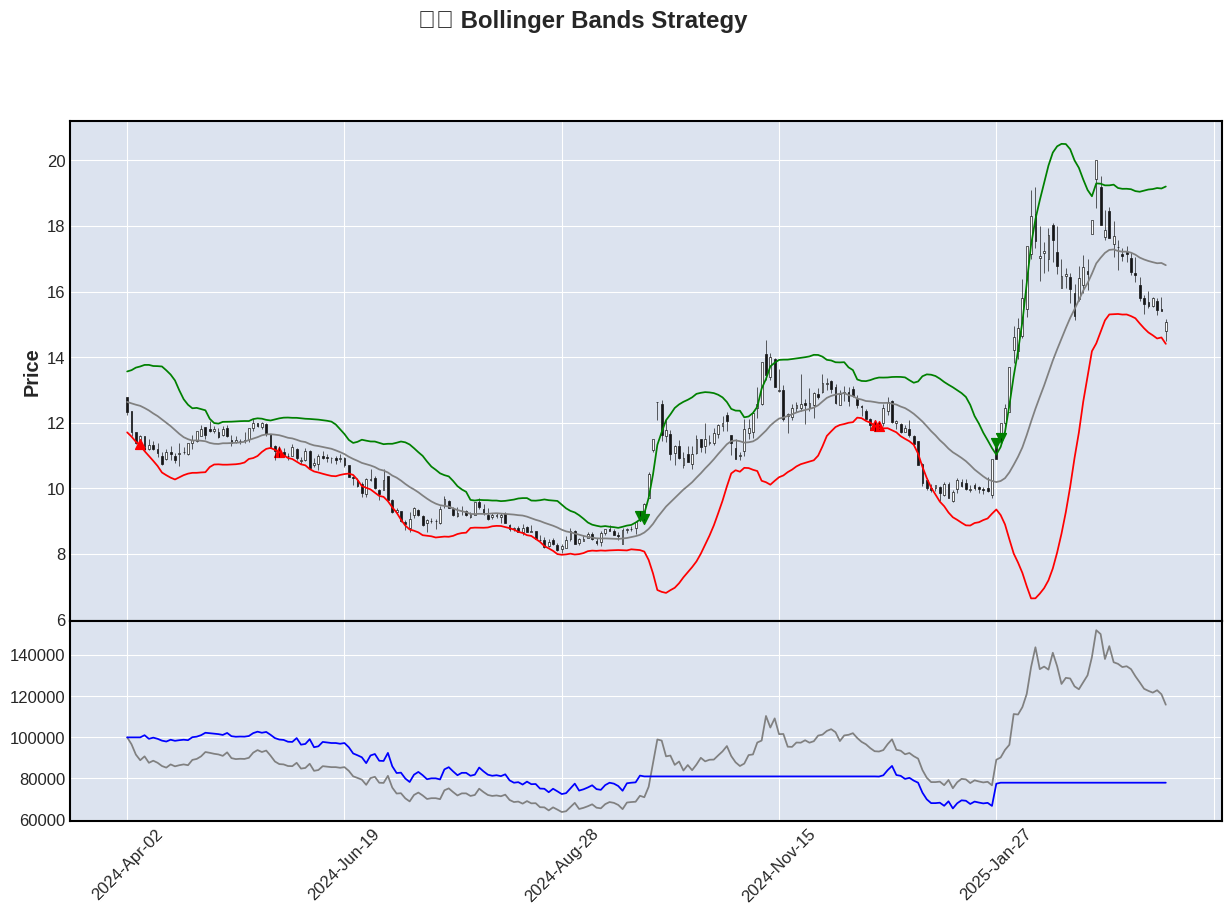

In [45]:
strategy.back_test(
    start_time=datetime(2024, 4, 1),
    end_time=datetime(2025, 4, 1),
    symbol='600588',
    frame='1d',
    name='用友 Bollinger Bands Strategy',
    investment=100000,
    show_indicators=['boll']
)